# Imp libraries:

In [5]:
################################## Data Analysis & Calculation ##################################

import pandas as pd 
import numpy as np 

################# Machine Learning ################
import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor

################# Data Visualization ################
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


# Data Import

In [6]:
df=pd.read_csv(r"C:\Users\acer\Downloads\T-test-20230205T122535Z-001\T-test\LungCapData.csv")
df

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no
...,...,...,...,...,...,...
720,5.725,9,56.0,no,female,no
721,9.050,18,72.0,yes,male,yes
722,3.850,11,60.5,yes,female,no
723,9.825,15,64.9,no,female,no


# Data Type

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LungCap    725 non-null    float64
 1   Age        725 non-null    int64  
 2   Height     725 non-null    float64
 3   Smoke      725 non-null    object 
 4   Gender     725 non-null    object 
 5   Caesarean  725 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 34.1+ KB


# Univariate Analysis

In [8]:
df.describe()

,LungCap,Age,Height
count,725.000000,725.000000,725.000000
mean,7.863148,12.326897,64.836276
std,2.662008,4.004750,7.202144
min,0.507000,3.000000,45.300000
25%,6.150000,9.000000,59.900000
50%,8.000000,13.000000,65.400000
75%,9.800000,15.000000,70.300000
max,14.675000,19.000000,81.800000


# EDA

####  Treatment of Outlier -- Winsorizing Technique

<AxesSubplot:>

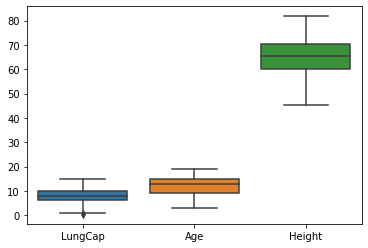

In [9]:
sns.boxplot(data=data)

In [10]:
q1 = data['LungCap'].quantile(0.25)
q3 = data['LungCap'].quantile(0.75)
iqr = q3-q1 #Interquartile range

lower_limit = q1-1.5*iqr #acceptable range
lower_limit

0.6749999999999998

In [11]:
data['LungCap']=np.where(data['LungCap'] < lower_limit,lower_limit,data["LungCap"]) # lower limit

<AxesSubplot:ylabel='LungCap'>

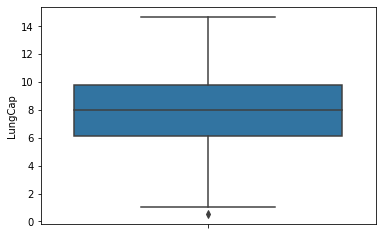

In [12]:
sns.boxplot(y="LungCap",data=df)

<AxesSubplot:>

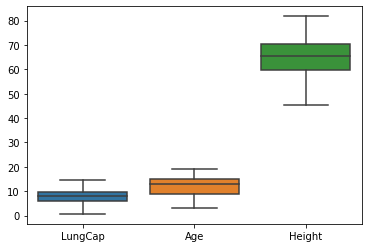

In [13]:
sns.boxplot(data=data)

#### Missing Value

In [14]:
df.isna().sum()

LungCap      0
Age          0
Height       0
Smoke        0
Gender       0
Caesarean    0
dtype: int64

# Step 3 : Splitting the data in Training and Test set
#### Using sklearn we split 70% of our data into training set and rest in test set.
#### Setting random_state will give the same training and test set everytime on running the code

In [15]:
Quantitative_Variable = data[data.select_dtypes(include=[np.number]).columns.tolist()]
Quantitative_Variable.head(3)

,LungCap,Age,Height
0,6.475,6,62.1
1,10.125,18,74.7
2,9.550,16,69.7


In [16]:
Qualitative_Variable = data[data.select_dtypes(include=['object']).columns.tolist()]
Qualitative_Variable.head(3)

,Smoke,Gender,Caesarean
0,no,male,no
1,yes,female,no
2,no,female,yes


In [17]:
from sklearn.preprocessing import LabelEncoder
Qualitative_Variable=Qualitative_Variable.apply(LabelEncoder().fit_transform) # label in ascending order
Qualitative_Variable.head()

,Smoke,Gender,Caesarean
0,0,1,0
1,1,0,0
2,0,0,1
3,0,1,0
4,0,1,0


In [18]:
df = pd.concat([Qualitative_Variable, Quantitative_Variable],axis=1)
df.head()

,Smoke,Gender,Caesarean,LungCap,Age,Height
0,0,1,0,6.475,6,62.1
1,1,0,0,10.125,18,74.7
2,0,0,1,9.550,16,69.7
3,0,1,0,11.125,14,71.0
4,0,1,0,4.800,5,56.9


In [19]:
# Putting feature variable to X
X = df.drop('LungCap', axis= 1)

# Putting response variable to y
y = df[['LungCap']]

#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, train_size=0.7 ,random_state=120)

In [20]:
df = pd.concat([y_train, X_train], axis=1)
df.head()

,LungCap,Smoke,Gender,Caesarean,Age,Height
16,7.875,0,1,0,15,59.2
605,8.575,0,1,1,16,67.1
268,7.975,0,1,0,9,61.9
105,3.425,0,0,0,5,51.7
715,8.725,0,0,0,19,68.4


# Correlation Matrix

<AxesSubplot:title={'center':'LungCap vs Height '}, xlabel='Height', ylabel='LungCap'>

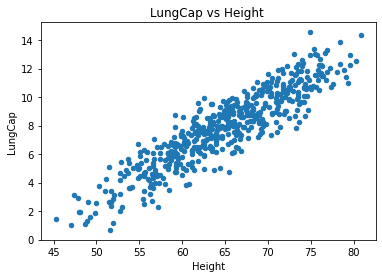

In [21]:
df.plot.scatter(x='Height', y='LungCap', title='LungCap vs Height ')

<AxesSubplot:title={'center':'LungCap vs Age '}, xlabel='Age', ylabel='LungCap'>

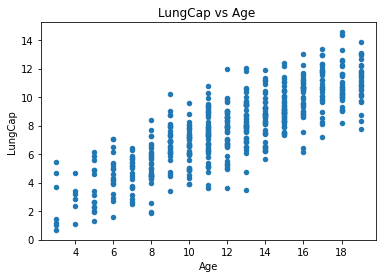

In [22]:
df.plot.scatter(x='Age', y='LungCap', title='LungCap vs Age ')

In [23]:
df.corr()

,LungCap,Smoke,Gender,Caesarean,Age,Height
LungCap,1.000000,0.097722,0.175767,0.016963,0.819515,0.909426
Smoke,0.097722,1.000000,-0.043708,0.061217,0.210672,0.187357
Gender,0.175767,-0.043708,1.000000,-0.003562,-0.011177,0.151732
Caesarean,0.016963,0.061217,-0.003562,1.000000,0.073059,0.063201
Age,0.819515,0.210672,-0.011177,0.073059,1.000000,0.839823
Height,0.909426,0.187357,0.151732,0.063201,0.839823,1.000000


<AxesSubplot:>

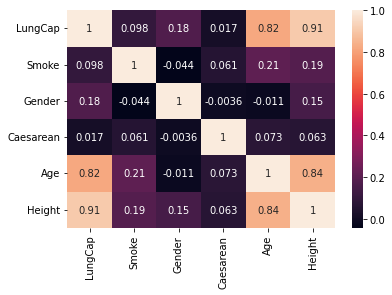

In [24]:
sns.heatmap(df.corr(),annot = True)

#### Here, Age=82 and Height=91 has strong positive correlationship with Lung capacity

### Multicolinearity (with the help of VIF)

In [25]:
df.head()

,LungCap,Smoke,Gender,Caesarean,Age,Height
16,7.875,0,1,0,15,59.2
605,8.575,0,1,1,16,67.1
268,7.975,0,1,0,9,61.9
105,3.425,0,0,0,5,51.7
715,8.725,0,0,0,19,68.4


In [26]:
X1 = df.drop(['LungCap'],axis=1)
X1.columns

Index(['Smoke', 'Gender', 'Caesarean', 'Age', 'Height'], dtype='object')

In [27]:
X1=df.drop(['LungCap'],axis=1)
VIF = pd.Series([variance_inflation_factor(X1.values, i) # i = 0
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
VIF

Smoke         1.176323
Gender        2.097715
Caesarean     1.315849
Age          20.435492
Height       22.673604
dtype: float64

In [28]:
import statsmodels.formula.api as smf
model2 = smf.ols('LungCap ~ Smoke + Gender + Caesarean + Age + Height  ',data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                LungCap   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     569.4
Date:                Fri, 23 Jun 2023   Prob (F-statistic):          5.33e-204
Time:                        20:03:11   Log-Likelihood:                -733.06
No. Observations:                 507   AIC:                             1478.
Df Residuals:                     501   BIC:                             1503.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.4375      0.583    -19.605      0.000     -12.584     -10.291
Smoke         -0.6955      0.151     -4.595      0.000      -0.993      -0.398
Gender         0.3496      0.096      3.632      0.000       0.161       0.539
Caesarean     -0.2540      0.109     -2.337      0.020      -0.468      -0.040
Age            0.1578      0.022      7.183      0.000       0.115       0.201
Height         0.2672      0.012     21.514      0.000       0.243       0.292
==============================================================================
Omnibus:                        3.429   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.180   Jarque-Bera (JB):                3.369
Skew:                          -0.160   Prob(JB):                        0.186
Kurtosis:                       2.761   Cond. No.                         846.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### There is Linear relationship between LungCap and Height , Age
#### 85% is accuracy of model , so we say model is good fit
#### Y = -11.4375 + 0.1578 * Age + 0.2672 * Height

## Method 2

In [29]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
Model3= lreg.fit(X_train,y_train)

In [30]:
np.round(Model3.intercept_,4)

array([-11.4375])

In [31]:
np.round(Model3.coef_,4)

array([[-0.6955,  0.3496, -0.254 ,  0.1578,  0.2672]])

In [32]:
np.round(Model3.score(X_train,y_train),3)

0.85

# Assumption of Model
 ###### Linearity
 ###### Normality
 ###### Homoscedasicity
 ###### Model Error has to be independently identificaly Distibuted

In [33]:
df.head()

,LungCap,Smoke,Gender,Caesarean,Age,Height
16,7.875,0,1,0,15,59.2
605,8.575,0,1,1,16,67.1
268,7.975,0,1,0,9,61.9
105,3.425,0,0,0,5,51.7
715,8.725,0,0,0,19,68.4


In [34]:
# Y = intercet + b1 *Age + b2 * Height
Y = -11.4375 + 0.1578 * 15  + 0.2672 * 59.2
Y

6.747740000000002

In [35]:
df['fitted_value']=model2.fittedvalues #Predicted Value
df['residual']=model2.resid  #Error
df.head()

,LungCap,Smoke,Gender,Caesarean,Age,Height,fitted_value,residual
16,7.875,0,1,0,15,59.2,7.098411,0.776589
605,8.575,0,1,1,16,67.1,9.113275,-0.538275
268,7.975,0,1,0,9,61.9,6.873378,1.101622
105,3.425,0,0,0,5,51.7,3.167004,0.257996
715,8.725,0,0,0,19,68.4,9.838336,-1.113336


## Linearity

<AxesSubplot:title={'center':'LungCap vs Height'}, xlabel='Height', ylabel='LungCap'>

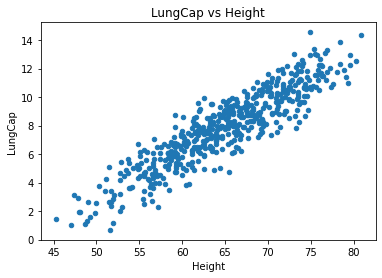

In [36]:
df.plot.scatter(x='Height', y='LungCap', title='LungCap vs Height')

## Homoscedasicity

<AxesSubplot:xlabel='fitted_value', ylabel='residual'>

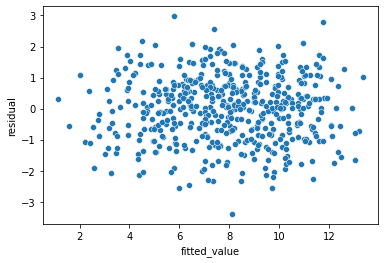

In [37]:
sns.scatterplot(x='fitted_value', y='residual',data=df)

## Normality

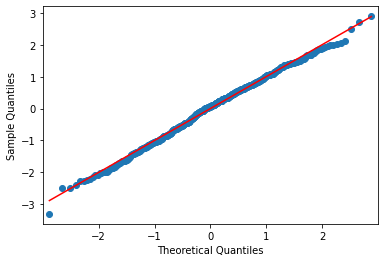

In [38]:
import statsmodels.api as sm
fig = sm.qqplot(df['residual'], fit=True, line='s') # s indicate standardized line
plt.show()

# Model Error are IID

<AxesSubplot:ylabel='Frequency'>

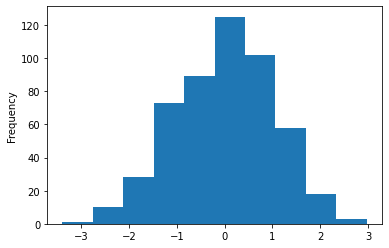

In [39]:
df['residual'].plot.hist()

# Prediction on Test Data (unseen data)

In [40]:
df_test=pd.concat([X_test,y_test],axis=1)

df_test.head()

,Smoke,Gender,Caesarean,Age,Height,LungCap
470,0,1,1,10,65.4,7.850
414,0,1,0,10,66.8,8.125
413,0,0,1,19,75.8,11.000
465,0,1,0,5,52.0,3.175
541,0,1,0,10,60.6,6.850


In [41]:
df_test['Prediction']=model2.predict(df_test) # predict = all row prediction ( Auto )
df_test.head()

,Smoke,Gender,Caesarean,Age,Height,LungCap,Prediction
470,0,1,1,10,65.4,7.850,7.712437
414,0,1,0,10,66.8,8.125,8.340556
413,0,0,1,19,75.8,11.000,11.561827
465,0,1,0,5,52.0,3.175,3.596783
541,0,1,0,10,60.6,6.850,6.683740


In [42]:
# Y = intercet + b1 *Age + b2 * Height
Y = -11.4375 + 0.1578 * 10  + 0.2672 * 65.4
Y

7.615380000000002

## Test

In [43]:
from sklearn.metrics import r2_score
r2 = r2_score(df.LungCap, df.fitted_value)
print('R2 score for model Performance on Test', np.round(r2,2))

R2 score for model Performance on Test 0.85


#### Model is good fit on Train dataset & Performance of model on Test data is also good fit

Thank You!!